### Video, Speech and Text

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

class FeedForwardNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FeedForwardNetwork, self).__init__()
        self.ffn = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),  # Add dropout here
            nn.Linear(hidden_dim, hidden_dim)
        )
    
    def forward(self, x):
        return self.ffn(x)

class SimpleVATTEmotionPredictor(nn.Module):
    def __init__(self, audio_dim, text_dim, video_dim, common_space_dim, hidden_dim, num_classes):
        super(SimpleVATTEmotionPredictor, self).__init__()
        
        self.audio_ffn = FeedForwardNetwork(audio_dim, hidden_dim)
        self.text_ffn = FeedForwardNetwork(text_dim, hidden_dim)
        
       # Projection heads for common spaces
        self.video_to_va = nn.Sequential(
            nn.Linear(video_dim, common_space_dim),
            nn.BatchNorm1d(common_space_dim)
        )

        
        self.audio_to_va = nn.Sequential(
            nn.Linear(hidden_dim, common_space_dim),
            nn.BatchNorm1d(common_space_dim)
        )
        self.text_to_vt = nn.Sequential(
            nn.Linear(hidden_dim, common_space_dim),
            nn.BatchNorm1d(common_space_dim)
        )
        self.video_to_vt = nn.Sequential(
            nn.Linear(common_space_dim, common_space_dim),
            nn.BatchNorm1d(common_space_dim)
        )

        self.classifier = nn.Sequential(
            nn.Linear(common_space_dim * 4, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),  # Add dropout here
            nn.Linear(hidden_dim, 256),
            nn.Linear(256, num_classes)
        )

    def forward(self, video_features, audio_features, text_features):
        audio_hidden = self.audio_ffn(audio_features)
        text_hidden = self.text_ffn(text_features)
        
        video_hidden = video_features
        
        # Project features into common spaces
        z_v_va = self.video_to_va(video_hidden)
        z_a_va = self.audio_to_va(audio_hidden)
        z_t_vt = self.text_to_vt(text_hidden)
        z_v_vt = self.video_to_vt(z_v_va)

        # Concatenate the common space outputs
        combined_embedding = torch.cat([z_v_va, z_a_va, z_v_vt, z_t_vt], dim=-1)
        
        emotion_logits = self.classifier(combined_embedding)
        
        return emotion_logits



### Video and Speech

In [2]:
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.preprocessing import LabelEncoder

# class FeedForwardNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super(FeedForwardNetwork, self).__init__()
#         self.ffn = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Add dropout here
#             nn.Linear(hidden_dim, hidden_dim)
#         )
    
#     def forward(self, x):
#         return self.ffn(x)

# class SimpleVATTEmotionPredictor(nn.Module):
#     def __init__(self, audio_dim, video_dim, common_space_dim, hidden_dim, num_classes):
#         super(SimpleVATTEmotionPredictor, self).__init__()
        
#         self.audio_ffn = FeedForwardNetwork(audio_dim, hidden_dim)
        
#         # Projection heads for common spaces
#         self.video_to_va = nn.Sequential(
#             nn.Linear(video_dim, common_space_dim),
#             nn.BatchNorm1d(common_space_dim)
#         )
        
#         self.audio_to_va = nn.Sequential(
#             nn.Linear(hidden_dim, common_space_dim),
#             nn.BatchNorm1d(common_space_dim)
#         )

#         self.video_to_vt = nn.Sequential(
#             nn.Linear(common_space_dim, common_space_dim),
#             nn.BatchNorm1d(common_space_dim)
#         )

#         self.classifier = nn.Sequential(
#             nn.Linear(common_space_dim * 2, hidden_dim),  # Only video and audio
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Add dropout here
#             nn.Linear(hidden_dim, 256),
#             nn.Linear(256, num_classes)
#         )

#     def forward(self, video_features, audio_features):
#         audio_hidden = self.audio_ffn(audio_features)
        
#         video_hidden = video_features
        
#         # Project features into common spaces
#         z_v_va = self.video_to_va(video_hidden)
#         z_a_va = self.audio_to_va(audio_hidden)
#         z_v_vt = self.video_to_vt(z_v_va)

#         # Concatenate the common space outputs
#         combined_embedding = torch.cat([z_v_va, z_a_va], dim=-1)
        
#         emotion_logits = self.classifier(combined_embedding)
        
#         return emotion_logits


## Speech and Text

In [3]:
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.preprocessing import LabelEncoder

# class FeedForwardNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super(FeedForwardNetwork, self).__init__()
#         self.ffn = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Add dropout here
#             nn.Linear(hidden_dim, hidden_dim)
#         )
    
#     def forward(self, x):
#         return self.ffn(x)

# class SimpleVATTEmotionPredictor(nn.Module):
#     def __init__(self, audio_dim, text_dim, common_space_dim, hidden_dim, num_classes):
#         super(SimpleVATTEmotionPredictor, self).__init__()
        
#         self.audio_ffn = FeedForwardNetwork(audio_dim, hidden_dim)
#         self.text_ffn = FeedForwardNetwork(text_dim, hidden_dim)
        
#         # Projection heads for common spaces
#         self.audio_to_va = nn.Sequential(
#             nn.Linear(hidden_dim, common_space_dim),
#             nn.BatchNorm1d(common_space_dim)
#         )
#         self.text_to_vt = nn.Sequential(
#             nn.Linear(hidden_dim, common_space_dim),
#             nn.BatchNorm1d(common_space_dim)
#         )

#         # The first linear layer should expect 2 * common_space_dim as input
#         self.classifier = nn.Sequential(
#             nn.Linear(common_space_dim * 2, 512),  # Updated
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(512, 256),
#             nn.Linear(256, num_classes)
#         )

#     def forward(self, audio_features, text_features):
#         audio_hidden = self.audio_ffn(audio_features)
#         text_hidden = self.text_ffn(text_features)
        
#         # Project features into common spaces
#         z_a_va = self.audio_to_va(audio_hidden)
#         z_t_vt = self.text_to_vt(text_hidden)

#         # Concatenate the common space outputs
#         combined_embedding = torch.cat([z_a_va, z_t_vt], dim=-1)
        
#         emotion_logits = self.classifier(combined_embedding)
        
#         return emotion_logits


### Without projection

In [4]:
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.preprocessing import LabelEncoder

# class FeedForwardNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super(FeedForwardNetwork, self).__init__()
#         self.ffn = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Add dropout here
#             nn.Linear(hidden_dim, 256)
#         )
    
#     def forward(self, x):
#         return self.ffn(x)

# class SimpleVATTEmotionPredictor(nn.Module):
#     def __init__(self, audio_dim, text_dim, video_dim, hidden_dim, num_classes):
#         super(SimpleVATTEmotionPredictor, self).__init__()
        
#         self.audio_ffn = FeedForwardNetwork(audio_dim, hidden_dim)
#         self.text_ffn = FeedForwardNetwork(text_dim, hidden_dim)
        

#         self.classifier = nn.Sequential(
#             nn.Linear(256 * 3, 256),  # Input size is now hidden_dim * 3
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Add dropout here
#             nn.Linear(256, num_classes)
#         )

#     def forward(self, video_features, audio_features, text_features):
#         audio_hidden = self.audio_ffn(audio_features)
#         text_hidden = self.text_ffn(text_features)
#         video_hidden = video_features
        
#         # Concatenate the outputs from all modalities
#         combined_embedding = torch.cat([audio_hidden, text_hidden, video_hidden], dim=-1)
        
#         emotion_logits = self.classifier(combined_embedding)
        
#         return emotion_logits


In [5]:
# Load the CSVs
video_features = pd.read_csv("F:/thesis/Features/Final/Updated/vidoes_features_trans.csv").drop(columns=["Label"])
audio_features = pd.read_csv("F:/thesis/Features/Final/Updated/Audio_Features_final_wave2vec.csv").drop(columns=["Link","Label"])
text_features = pd.read_csv("F:/thesis/Features/Final/Updated/urdu_embeddings_xlmr_large.csv").drop(columns=["Link"])

# Define feature columns
feature_columns_video = [col for col in video_features.columns if col.startswith('Embedding')]
feature_columns_audio = [col for col in audio_features.columns if col.startswith('Audio')]
feature_columns_text = [col for col in text_features.columns if col.startswith('Feature')]

# Labels should be handled separately
labels = text_features['Label'].values  # Ensure 'Label' exists in text_features
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Prepare features and labels
X_video = video_features[feature_columns_video].values
X_audio = audio_features[feature_columns_audio].values
X_text = text_features[feature_columns_text].values

# Convert to tensors
X_video_tensor = torch.tensor(X_video, dtype=torch.float32)
X_audio_tensor = torch.tensor(X_audio, dtype=torch.float32)
X_text_tensor = torch.tensor(X_text, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Print shapes to verify
print(f"Video features tensor shape: {X_video_tensor.shape}")
print(f"Audio features tensor shape: {X_audio_tensor.shape}")
print(f"Text features tensor shape: {X_text_tensor.shape}")
print(f"Labels tensor shape: {y_tensor.shape}")

Video features tensor shape: torch.Size([8278, 256])
Audio features tensor shape: torch.Size([8278, 1024])
Text features tensor shape: torch.Size([8278, 1024])
Labels tensor shape: torch.Size([8278])


In [6]:
# from imblearn.over_sampling import SMOTE
# # Initialize SMOTE
# smote = SMOTE(random_state=42)
# # Apply SMOTE to upsample the data
# X_resampled, y_resampled = smote.fit_resample(combined_features, text_labels_numeric)
# X_resampled = torch.tensor(X_resampled, dtype=torch.float32)
# y_resampled = torch.tensor(y_resampled, dtype=torch.long)


# # #X_resampled = X_resampled.unsqueeze(1).unsqueeze(3).float()
# # X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# # X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
# Train-Test-Validation split
from sklearn.model_selection import train_test_split

X_audio_train, X_audio_test, X_video_train, X_video_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_audio_tensor.numpy(), X_video_tensor.numpy(), X_text_tensor.numpy(), y_tensor.numpy(), test_size=0.2, random_state=42
)

X_audio_val, X_audio_test, X_video_val, X_video_test, X_text_val, X_text_test, y_val, y_test = train_test_split(
    X_audio_test, X_video_test, X_text_test, y_test, test_size=0.5, random_state=42
)

batch_size = 32

# Create DataLoader for training, validation, and test sets
train_dataset = TensorDataset(torch.tensor(X_audio_train, dtype=torch.float32),
                              torch.tensor(X_video_train, dtype=torch.float32),
                              torch.tensor(X_text_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = TensorDataset(torch.tensor(X_audio_val, dtype=torch.float32),
                                   torch.tensor(X_video_val, dtype=torch.float32),
                                   torch.tensor(X_text_val, dtype=torch.float32),
                                   torch.tensor(y_val, dtype=torch.long))
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(torch.tensor(X_audio_test, dtype=torch.float32),
                             torch.tensor(X_video_test, dtype=torch.float32),
                             torch.tensor(X_text_test, dtype=torch.float32),
                             torch.tensor(y_test, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [8]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
speech_input_dim = X_audio_train.shape[1]
video_input_dim = X_video_train.shape[1]
video_input_dim = X_video_train.shape[1]
text_input_dim = X_text_train.shape[1]

hidden_dim = 512  # Hidden dimension inside feed-forward networks
common_space_dim = 256  # Common space dimension for video-audio and video-text
num_classes = len(label_encoder.classes_)  # Number of emotion classes

# Instantiate the model
model = SimpleVATTEmotionPredictor(speech_input_dim, text_input_dim, video_input_dim, common_space_dim,hidden_dim, num_classes)
model.to(device)

SimpleVATTEmotionPredictor(
  (audio_ffn): FeedForwardNetwork(
    (ffn): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (text_ffn): FeedForwardNetwork(
    (ffn): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (video_to_va): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (audio_to_va): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (text_to_vt): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
 

In [9]:
video_input_dim

256

In [10]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 1e-5)  # Adjust weight_decay as necessary
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
num_epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
validation_accuracies = []

best_accuracy = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for speech_features, video_features, text_features, targets in train_data_loader:
        speech_features, video_features, text_features, targets = (
            speech_features.to(device).float(),
            video_features.to(device).float(),
            text_features.to(device).float(),
            targets.to(device)
        )
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(video_features, speech_features, text_features)
     
        # Loss calculation and backpropagation
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted_train = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted_train == targets).sum().item()
    
    # Average training loss and accuracy
    avg_loss = total_loss / len(train_data_loader)
    train_losses.append(avg_loss)
    accuracy_train = correct_train / total_train
    train_accuracies.append(accuracy_train)
    
    # Evaluate on the validation set
    with torch.no_grad():
        model.eval()
        correct_val = 0
        total_val = 0
        val_loss_total = 0.0
        
        for speech_features, video_features, text_features, targets in validation_loader:
            speech_features, video_features, text_features, targets = (
                speech_features.to(device).float(),
                video_features.to(device).float(),
                text_features.to(device).float(),
                targets.to(device)
            )
            outputs = model(video_features, speech_features, text_features)
            _, predicted_val = torch.max(outputs, 1)

            # Accumulate validation loss
            val_loss = criterion(outputs, targets).item()
            val_loss_total += val_loss

            total_val += targets.size(0)
            correct_val += (predicted_val == targets).sum().item()

        accuracy_val = correct_val / total_val
        validation_accuracies.append(accuracy_val)

        # Print epoch stats
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_loss:.4f}, "
              f"Train Accuracy: {accuracy_train * 100:.2f}%, "
              f"Validation Accuracy: {accuracy_val * 100:.2f}%")

        # Early stopping
        # if accuracy_val > best_accuracy:
        #     best_accuracy = accuracy_val
        #     print("Validation accuracy improved, saving model...")
        #     torch.save(model.state_dict(), 'best_model.pth')

    # Update learning rate
    scheduler.step()

# Load best model for evaluation
# model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on the test set
with torch.no_grad():
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss_total = 0.0

    for speech_features, video_features, text_features, targets in test_loader:
        speech_features, video_features, text_features, targets = (
            speech_features.to(device).float(),
            video_features.to(device).float(),
            text_features.to(device).float(),
            targets.to(device)
        )
        outputs = model(video_features, speech_features, text_features)
        _, predicted_test = torch.max(outputs, 1)

        # Accumulate test loss
        test_loss = criterion(outputs, targets).item()
        test_loss_total += test_loss
        
        total_test += targets.size(0)
        correct_test += (predicted_test == targets).sum().item()

    accuracy_test = correct_test / total_test
    avg_test_loss = test_loss_total / len(test_loader)
    
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy_test * 100:.2f}%")

Epoch [1/100], Train Loss: 0.7438, Train Accuracy: 77.12%, Validation Accuracy: 79.95%
Epoch [2/100], Train Loss: 0.6417, Train Accuracy: 80.10%, Validation Accuracy: 82.37%
Epoch [3/100], Train Loss: 0.6117, Train Accuracy: 80.91%, Validation Accuracy: 83.09%
Epoch [4/100], Train Loss: 0.5661, Train Accuracy: 82.00%, Validation Accuracy: 83.82%
Epoch [5/100], Train Loss: 0.5614, Train Accuracy: 82.36%, Validation Accuracy: 82.37%
Epoch [6/100], Train Loss: 0.5522, Train Accuracy: 82.60%, Validation Accuracy: 82.00%
Epoch [7/100], Train Loss: 0.5176, Train Accuracy: 83.30%, Validation Accuracy: 82.61%
Epoch [8/100], Train Loss: 0.5168, Train Accuracy: 83.36%, Validation Accuracy: 82.73%
Epoch [9/100], Train Loss: 0.5110, Train Accuracy: 83.27%, Validation Accuracy: 84.06%
Epoch [10/100], Train Loss: 0.5043, Train Accuracy: 83.51%, Validation Accuracy: 83.33%
Epoch [11/100], Train Loss: 0.4329, Train Accuracy: 86.08%, Validation Accuracy: 84.54%
Epoch [12/100], Train Loss: 0.4065, Train

In [13]:
import matplotlib.pyplot as plt
def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, validation_accuracies=None):
    plt.figure(figsize=(15, 5))
    # Plotting Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    #plt.plot(test_losses, label='Test Loss', color='red')
    if validation_accuracies is not None:
        plt.plot(validation_accuracies, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', color='blue')
   # plt.plot(test_accuracies, label='Test Accuracy', color='red')
    if validation_accuracies is not None:
        plt.plot(validation_accuracies, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

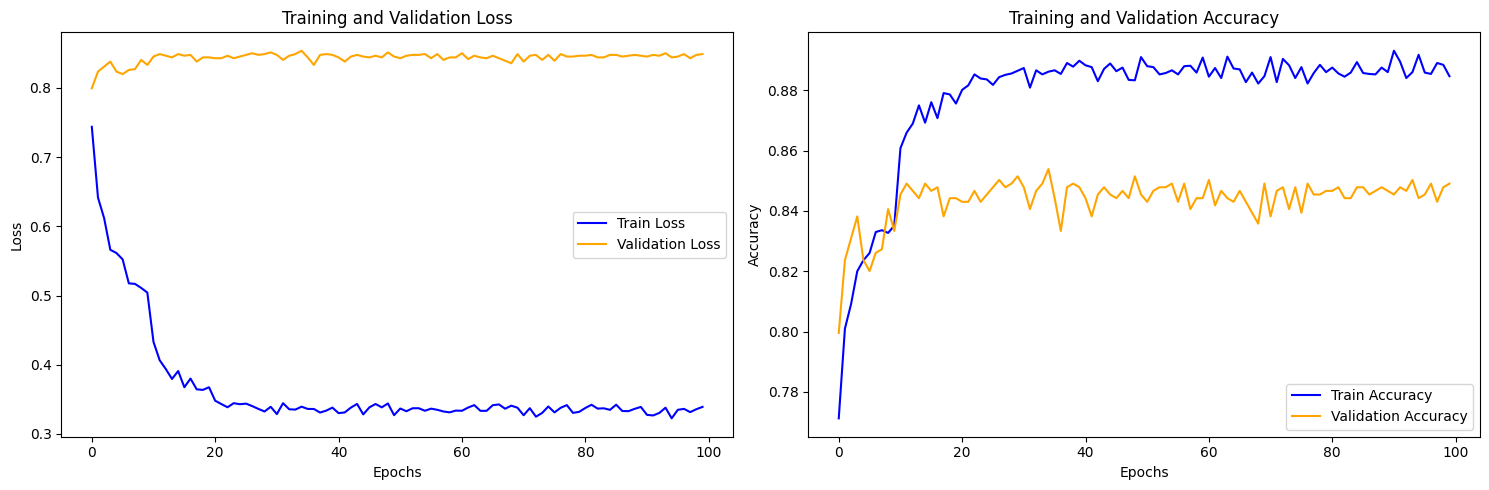

F1 Score: 0.8463
Accuracy: 0.8466
Report :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       201
           1       0.83      0.87      0.85       186
           2       0.85      0.90      0.88       109
           3       0.85      0.80      0.82       181
           4       0.85      0.86      0.86       151

    accuracy                           0.85       828
   macro avg       0.85      0.85      0.85       828
weighted avg       0.85      0.85      0.85       828



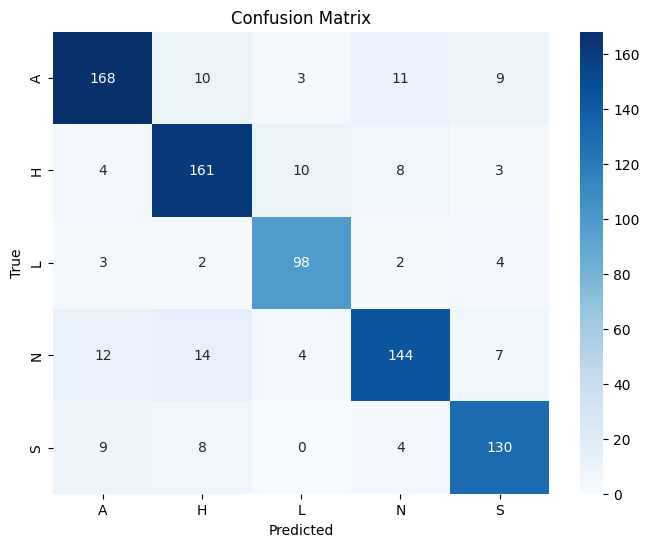

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Loss and Accuracy
plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, validation_accuracies)

# Calculate F1 Score
model.eval()
all_predicted = []
all_targets = []

for batch in test_loader:
    # Unpack the batch
    speech_features, video_features, text_features, targets = batch
    
    # Move data to device
    speech_features, video_features, text_features, targets = (
        speech_features.to(device).float(),
        video_features.to(device).float(),
        text_features.to(device).float(),
        targets.to(device)
    )
    
    # Forward pass
    outputs = model(video_features, speech_features, text_features)
    _, predicted = torch.max(outputs, 1)
    
    all_predicted.extend(predicted.cpu().numpy())
    all_targets.extend(targets.cpu().numpy())

# Calculate accuracy
accuracy = sum([1 for i, j in zip(all_predicted, all_targets) if i == j]) / len(all_targets)

f1 = f1_score(all_targets, all_predicted, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Classification Report
report = classification_report(all_targets, all_predicted)
print(f"Accuracy: {accuracy:.4f}")
print("Report :\n", report)

# Confusion Matrix
labels_list = label_encoder.classes_
conf_matrix = confusion_matrix(all_targets, all_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
